<a href="https://colab.research.google.com/github/suribe1010/Kaggle/blob/master/Transfer_Learning_Example_for_NLP_ULMFiT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q torch==1.4.0 torchvision

In [3]:
!pip install fastai


In [0]:
import fastai
from fastai import *
from fastai.text import *
import pandas as pd
import numpy as np
from functools import partial
import io
import os


In [5]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers','footers', 'quotes'))

In [0]:
documents=dataset.data

In [7]:
df = pd.DataFrame({'label': dataset.target, 'text': dataset.data})
df

,label,text
0,17,Well i'm not sure about the story nad it did s...
1,0,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,17,Although I realize that principle is not one o...
3,11,Notwithstanding all the legitimate fuss about ...
4,10,"Well, I will have to change the scoring on my ..."
...,...,...
11309,17,"Danny Rubenstein, an Israeli journalist, will ..."
11310,13,\n
11311,9,\nI agree. Home runs off Clemens are always m...
11312,4,I used HP DeskJet with Orange Micros Grappler ...


In [8]:
df = df[df['label'].isin([1,10])] 
df

,label,text
4,10,"Well, I will have to change the scoring on my ..."
10,1,Archive-name: graphics/resources-list/part1\nL...
17,10,"\nAnd of course, Mike Ramsey was (at one time)..."
24,10,"As I promised, I would give you the name of th..."
28,10,GAME(S) OF 4/15\n---------------\nADIRONDACK 6...
...,...,...
11248,10,The Hawks win!! Jermey Roenick scored his 50 ...
11259,10,I think that NHLPA' 93 is the best video game ...
11267,1,\nI am in the market for a 24-bit graphics car...
11288,1,"Hi there,\n\nis there anybody who know a polyg..."


In [9]:
df = df.reset_index(drop = True)
df

,label,text
0,10,"Well, I will have to change the scoring on my ..."
1,1,Archive-name: graphics/resources-list/part1\nL...
2,10,"\nAnd of course, Mike Ramsey was (at one time)..."
3,10,"As I promised, I would give you the name of th..."
4,10,GAME(S) OF 4/15\n---------------\nADIRONDACK 6...
...,...,...
1179,10,The Hawks win!! Jermey Roenick scored his 50 ...
1180,10,I think that NHLPA' 93 is the best video game ...
1181,1,\nI am in the market for a 24-bit graphics car...
1182,1,"Hi there,\n\nis there anybody who know a polyg..."


In [10]:
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

In [11]:
# Data Preprocessing
df['text'] = df['text'].str.replace("[^a-zA-Z]"," ")
df


,label,text
0,10,Well I will have to change the scoring on my ...
1,1,Archive name graphics resources list part La...
2,10,And of course Mike Ramsey was at one time ...
3,10,As I promised I would give you the name of th...
4,10,GAME S OF ADIRONDACK C...
...,...,...
1179,10,The Hawks win Jermey Roenick scored his ...
1180,10,I think that NHLPA is the best video game ...
1181,1,I am in the market for a bit graphics card...
1182,1,Hi there is there anybody who know a polygon...


In [12]:
# Get rid of stopwords
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Tokenization
tokenized_doc = df['text'].apply(lambda x: x.split())
tokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0       [Well, I, will, have, to, change, the, scoring...
1       [Archive, name, graphics, resources, list, par...
2       [And, of, course, Mike, Ramsey, was, at, one, ...
3       [As, I, promised, I, would, give, you, the, na...
4       [GAME, S, OF, ADIRONDACK, CDI, Adirondack, lea...
                              ...                        
1179    [The, Hawks, win, Jermey, Roenick, scored, his...
1180    [I, think, that, NHLPA, is, the, best, video, ...
1181    [I, am, in, the, market, for, a, bit, graphics...
1182    [Hi, there, is, there, anybody, who, know, a, ...
1183    [You, might, want, to, clarify, the, game, win...
Name: text, Length: 1184, dtype: object

In [13]:
# Remove stop words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc

0       [Well, I, change, scoring, playoff, pool, Unfo...
1       [Archive, name, graphics, resources, list, par...
2       [And, course, Mike, Ramsey, one, time, captain...
3       [As, I, promised, I, would, give, name, Panthe...
4       [GAME, S, OF, ADIRONDACK, CDI, Adirondack, lea...
                              ...                        
1179    [The, Hawks, win, Jermey, Roenick, scored, th,...
1180    [I, think, NHLPA, best, video, game, available...
1181    [I, market, bit, graphics, card, PC, ISA, bus,...
1182    [Hi, anybody, know, polygon, reduction, algori...
1183    [You, might, want, clarify, game, winning, str...
Name: text, Length: 1184, dtype: object

In [14]:
# De-tokenization
detokenized_doc=[]
for i in range (len(df)):
  t = ' '.join(tokenized_doc[i])
  detokenized_doc.append(t)
df['text'] = detokenized_doc
df

,label,text
0,10,Well I change scoring playoff pool Unfortunate...
1,1,Archive name graphics resources list part Last...
2,10,And course Mike Ramsey one time captain Buffal...
3,10,As I promised I would give name Panther presid...
4,10,GAME S OF ADIRONDACK CDI Adirondack leads seri...
...,...,...
1179,10,The Hawks win Jermey Roenick scored th goal Ha...
1180,10,I think NHLPA best video game available course...
1181,1,I market bit graphics card PC ISA bus wonderin...
1182,1,Hi anybody know polygon reduction algorithm ma...


In [15]:
# Split into training(60%) and validation(40%) sets
from sklearn.model_selection import train_test_split
df_train, df_valid = train_test_split(df, stratify=df['label'], test_size=0.4, random_state = 12)
df_train.shape
df_train

,label,text
1018,10,It looks like Edmonton Oilers decided take Eur...
762,10,This kills Speaking die hard I I read died har...
768,1,The idea clip one polygon using another polygo...
152,10,I Edmonton usually least OFTEN case treated ac...
426,10,You know absolutely right I think round player...
...,...,...
833,1,Forty two six times nine
378,10,Re Eric True fortunately get find would like w...
791,10,Well tentative rules anyway And course since s...
200,10,The FLYERS closed season last night th straigh...


In [16]:
# Prepare the data for the language model data
data_lm = TextLMDataBunch.from_df(train_df=df_train, valid_df=df_valid, path="")


In [17]:
# Prepare the data for classification model
data_clas = TextClasDataBunch.from_df(path=" ", train_df = df_train, valid_df = df_valid, vocab = data_lm.train_ds.vocab, bs=32)
data_clas

TextClasDataBunch;

Train: LabelList (710 items)
x: TextList
xxbos xxmaj it looks like xxmaj edmonton xxmaj oilers decided take xxmaj european xxunk spring xxmaj ranford xxmaj tugnutt xxmaj benning xxmaj manson xxmaj smith xxmaj buchberger xxmaj corson playing xxmaj canada xxmaj podein xxmaj weight playing xxup us xxmaj is xxmaj kravchuk playing xxmaj xxunk i know nagging injuries late season xxmaj podein interesting case eligible play xxmaj cape xxmaj breton xxup ahl playoffs like xxmaj kovalev xxmaj zubov xxmaj andersson obviously xxmaj sather xxmaj pocklington total xxunk everyone makes certainly case massively xxunk xxmaj paramount xxmaj new xxmaj york xxmaj rangers,xxbos xxmaj this xxunk xxmaj speaking die hard i i read xxunk hard xxunk xxmaj toronto xxmaj cup finals xxmaj first anyone planet heard team xxmaj detroit xxmaj al xxmaj xxunk however spell idiot name must xxmaj chicago xxup espn said even close xxmaj chicago xxunk win xxmaj norris xxmaj division xxmaj playoffs team clo

In [18]:
# FINE-TUNING THE PRE-TRAINED MODEL
# Create a learner object: learn. It will directly create a model

learn = language_model_learner(data_lm, arch = AWD_LSTM, pretrained = True,  
                               drop_mult=0.7)




In [19]:
# Train the learner object with learning rate = 1e-2
learn.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,6.089745,5.188661,0.243447,00:05


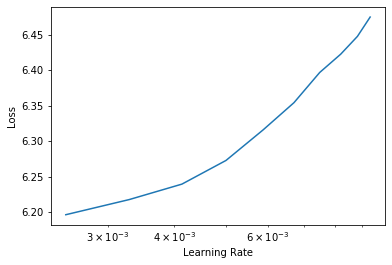

In [20]:
learn.recorder.plot()

In [0]:
# Save this encoder to use it for classification later
learn.save_encoder('ft_enc')

In [22]:
# Use the data_clas object to build a classifier with our fine-tuned encoder
learn = text_classifier_learner(data_clas, arch = AWD_LSTM, drop_mult=0.7) 
learn.load_encoder('ft_enc')


FileNotFoundError: ignored

epoch,train_loss,valid_loss,accuracy,time
0,0.755784,0.699080,0.493671,00:13


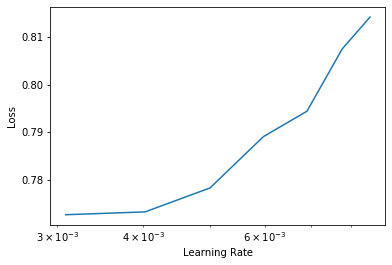

In [24]:
# We fit again the model
learn.fit_one_cycle(1, 1e-2)
learn.recorder.plot()

In [25]:
# Predictions for the validation set
preds, targets = learn.get_preds() 
predictions = np.argmax(preds, axis = 1)

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [27]:
# SOMETHING IS WRONG WITH THE PRE-TRAINED DATASET, BUT THE PROCEDURE SEEMS TO BE RIGHT
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,234,240


In [0]:
# MAKE SOME PREDICTIONS ABOUT THE FOLLOWING WORDS
#learn.predict("there is", n_words=10)

In [30]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.701730,0.692919,0.493671,00:14


In [31]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.669868,0.677437,0.575949,00:14
